In [26]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [28]:
!pip install konlpy > /dev/null

In [29]:
import nltk

In [30]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
import pandas as pd

In [32]:
df = pd.read_excel('./middle.xlsx')

In [33]:
df

,이름,종류,평점,숙박가격,도보시간,인기테그,별점 높은순 후기,별점 낮은순 후기,주소,객실수,총후기,대실가격,대실시간,위도,경도
0,앰배서더 서울 풀만 호텔,프리미엄호텔,4.8,250000,동대입구역 1번출구 250m,"['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...","['시설에 비해 가격도 저렴합니당', '너무너무 깨끗하고 쾌적합니다.', '룸서비스...",[],서울특별시 중구 동호로 287,269,169,NaN,NaN,37.560599,127.002136
1,글래드 여의도,4성급,4.7,200640,국회의사당역 4번출구 도보 1분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...","['정말 좋아요 말이 필요 없어요!', '컨디션은 항상 너무 좋네요! 최저가로 저렴...","['데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요', '...",서울특별시 영등포구 의사당대로 16,319,4416,NaN,NaN,37.527409,126.917265
2,글래드 마포,4성급,4.8,143000,공덕역 바로 앞,"['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']","['너무 좋았습니다! 다음에 재방문할게요~~!', '자주 놀러가는 곳이에요', '완...","['난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔', '지방에 ...",서울특별시 마포구 마포대로 92,378,7717,NaN,NaN,37.542844,126.951336
3,더 리프 사당,일반호텔,4.3,265000,서울특별시 관악구 남현 1길 66 사당역 5번 출구 도보 1분,"['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...","['너무좋았어용', '너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요', '기념일 ...",[],서울특별시 관악구 남현1길 66,한국어,77,NaN,NaN,37.475718,126.981124
4,나인트리 프리미어 로카우스 호텔 서울 용산,일반호텔,4.7,158000,용산역 1번 출구 도보 3분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...","['호캉스하기 좋아요', '좋아용 이용 추천', '어린 아이들이 놀기 좋은 적당한 ...",[],서울특별시 용산구 한강대로23길 25,274,36,NaN,NaN,37.527640,126.964349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,서울 인사동알게스트하우스,펜션/호스텔,4.8,60000,숙소 위치보기,['와이파이'],"['사장님너무친절하시고따뜻방이라 너무좋앗습니다', '깨끗하고 자취방 같이 아늑합니다...",[],서울특별시 종로구 수표로28길 12-3,NaN,4,NaN,NaN,37.573042,126.989218
1217,서울 룩스게스트하우스,펜션/호스텔,3.6,예약마감,숙소 위치보기,['와이파이'],"['수건 많음, 화장실은 살짝 냄새남, 잠 자기에는 편했음, 이불이 푹신했음', '...",[],서울특별시 마포구 와우산로 156 5층,NaN,13,NaN,NaN,37.554856,126.930407
1218,서울 Bottlehouse펜션,펜션/호스텔,4.0,예약마감,숙소 위치보기,"['와이파이', '독채객실']","['좋았어요!!!', '??숙소는 역근처 건물 3층에 위치하고 있어요. 찾아오기 어...",[],서울특별시 구로구 경인로25길 16 301호,NaN,3,NaN,NaN,37.497175,126.844208
1219,서울 종로준오호텔펜션,펜션/호스텔,5.0,90000,숙소 위치보기,"['와이파이', '상비약']",['숙소 깔끔하고 인테리어도 분위기 있어요! 특히 화장실 청소 잘되있습니다! 사장님...,[],서울특별시 종로구 인사동16길 6,NaN,1,NaN,NaN,37.575017,126.984243


In [12]:
df['인기테그']

0       ['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...
1       ['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...
2        ['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']
3       ['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...
4       ['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...
                              ...                        
1216                                             ['와이파이']
1217                                             ['와이파이']
1218                                     ['와이파이', '독채객실']
1219                                      ['와이파이', '상비약']
1220                                      ['와이파이', '상비약']
Name: 인기테그, Length: 1221, dtype: object

In [34]:
df['인기테그']=df['인기테그'].str.replace(',','')
df['인기테그']=df['인기테그'].str.replace('[','')
df['인기테그']=df['인기테그'].str.replace(']','')
df['인기테그']=df['인기테그'].str.replace("'",'')

df['인기테그']

<ipython-input-34-8ca3bf7b8f27>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['인기테그']=df['인기테그'].str.replace('[','')
<ipython-input-34-8ca3bf7b8f27>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['인기테그']=df['인기테그'].str.replace(']','')


0       주차가능 야외수영장 수영장 와이파이 사우나 클럽라운지 객실금연 레스토랑 바 연회장 ...
1       주차가능 조식운영 와이파이 객실금연 레스토랑 바 연회장 피트니스 뷔페 어메니티 24...
2                           주차가능 와이파이 객실금연 피트니스 어메니티 비즈니스
3                   스파/월풀/욕조 와이파이 객실금연 24시간데스크 비즈니스 수화물보관
4       주차가능 조식운영 와이파이 객실금연 레스토랑 연회장 피트니스 뷔페 어메니티 24시간...
                              ...                        
1216                                                 와이파이
1217                                                 와이파이
1218                                            와이파이 독채객실
1219                                             와이파이 상비약
1220                                             와이파이 상비약
Name: 인기테그, Length: 1221, dtype: object

In [35]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'


In [36]:
wc = WordCloud(background_color='white', max_words=2000,font_path=font_path)
tag_string = ' '.join(df['인기테그'])
wc.generate(tag_string)

In [ ]:
count = 0
for key, value in wc.words_.items():
  print(key, ':', value)
  count += 1
  if count > 10:
    break

어메니티 24시간데스크 : 1.0
무료영화 OTT : 0.8236994219653179
와이파이 VOD : 0.8005780346820809
주차가능 와이파이 : 0.7283236994219653
VOD 24시간데스크 : 0.6127167630057804
수화물보관 주차가능 : 0.5924855491329479
스파 월풀 : 0.5433526011560693
월풀 욕조 : 0.5433526011560693
와이파이 트윈베드 : 0.5346820809248555
와이파이 객실금연 : 0.5115606936416185
비즈니스 수화물보관 : 0.5086705202312138


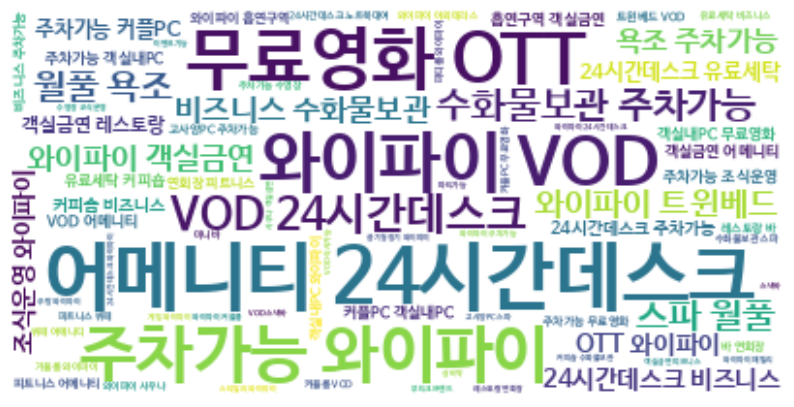

In [37]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
     

In [38]:
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(',','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('[','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(']','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace("'",'')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('고객님','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('노력하겠습니다','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('보답해드리겠습니다','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('부탁드리겠습니다','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('이용해주셔서','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('대처하겠습니다','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('앞으로도','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('불편한','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('죄송합니다','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('불편을','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('모시겠습니다','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('앞으로','')
df['별점 높은순 후기']

<ipython-input-38-800d673ba1b7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('[','')
<ipython-input-38-800d673ba1b7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(']','')


0       시설에 비해 가격도 저렴합니당 너무너무 깨끗하고 쾌적합니다. 룸서비스 최고 주차도 ...
1       정말 좋아요 말이 필요 없어요! 컨디션은 항상 너무 좋네요! 최저가로 저렴하게 호캉...
2       너무 좋았습니다! 다음에 재방문할게요~~! 자주 놀러가는 곳이에요 완벽합니당! 위치...
3       너무좋았어용 너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요 기념일 기념으로 방문한...
4       호캉스하기 좋아요 좋아용 이용 추천 어린 아이들이 놀기 좋은 적당한 깊이의 수영장이...
                              ...                        
1216    사장님너무친절하시고따뜻방이라 너무좋앗습니다 깨끗하고 자취방 같이 아늑합니다. 모텔은...
1217    수건 많음 화장실은 살짝 냄새남 잠 자기에는 편했음 이불이 푹신했음 가성비 접근성 ...
1218    좋았어요!!! ??숙소는 역근처 건물 3층에 위치하고 있어요. 찾아오기 어렵지 않아...
1219    숙소 깔끔하고 인테리어도 분위기 있어요! 특히 화장실 청소 잘되있습니다! 사장님도 ...
1220    독립된 화장실이 있어서 9만원 정도에 방을 잡았습니다. 늦은 시간에 예약했다지만 도...
Name: 별점 높은순 후기, Length: 1221, dtype: object

In [78]:
sw1=STOPWORDS
sw1.add('너무')
sw1.add('수 있도록')
sw1.add('너무')
sw1.add('잘 쉬다')
sw1.add('쉬다 갑니다')
sw1.add('잘쉬다갑니다')
sw1.add('잘 쉬었습니다')
sw1.add('깔끔하고')
sw1.add('깨끗하고')
sw1.add('좋습니다')
sw1.add('잘 쉬다')
sw1.add('이용해 주셔서')
sw1.add('소중한 후기')
sw1.add('저희 호텔을')

In [79]:
wc1 = WordCloud(background_color='white', max_words=2000,font_path=font_path, stopwords=sw1)
tag_string1 = ' '.join(df['별점 높은순 후기'])
wc1.generate(tag_string1)

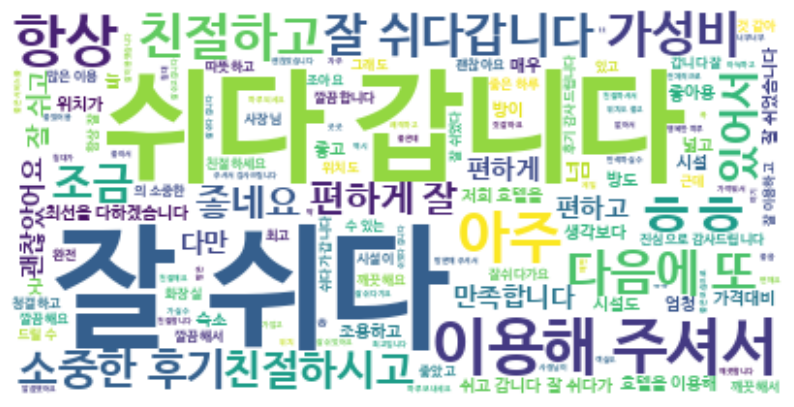

In [80]:
plt.figure(figsize=(10,6))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(',','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('[','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(']','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace("'",'')
df['별점 낮은순 후기']

<ipython-input-41-360585c93d3e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('[','')
<ipython-input-41-360585c93d3e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(']','')


0                                                        
1       데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요 12시까지...
2       난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔 지방에 살고 있어...
3                                                        
4                                                        
                              ...                        
1216                                                     
1217                                                     
1218                                                     
1219                                                     
1220                                                     
Name: 별점 낮은순 후기, Length: 1221, dtype: object

In [48]:
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('고객님','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('노력하겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('보답해드리겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('부탁드리겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('이용해주셔서','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('대처하겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('앞으로도','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('불편한','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('죄송합니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('불편을','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('모시겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('앞으로','')
     

In [49]:
df['별점 낮은순 후기'] = df['별점 낮은순 후기'].astype(str)

In [66]:
#불용어 처리
sw = STOPWORDS
sw.add('좋아요')
sw.add('안녕하세요')
sw.add('좋았습니다')
sw.add('불편을 드려')
sw.add('드려 죄송합니다')
sw.add('진짜')
sw.add('너무')
sw.add('그냥')
sw.add('정말')
sw.add('바로')
sw.add('계속')
sw.add('그리고')
sw.add('소중한후기')
sw.add('예약했는데')
sw.add('다른')
sw.add('다')
sw.add('좋았어요')
sw.add('좀')
sw.add('방')
sw.add('많이')
sw.add('객실')
sw.add('다시')
sw.add('그')
sw.add('더')
sw.add('감사합니다')
sw.add('했는데')
sw.add('있도록')

In [67]:
wc3 = WordCloud(background_color='white', max_words=2000,font_path=font_path, stopwords=sw)
tag_string3 = ' '.join(df['별점 낮은순 후기'])
wc3.generate(tag_string3)

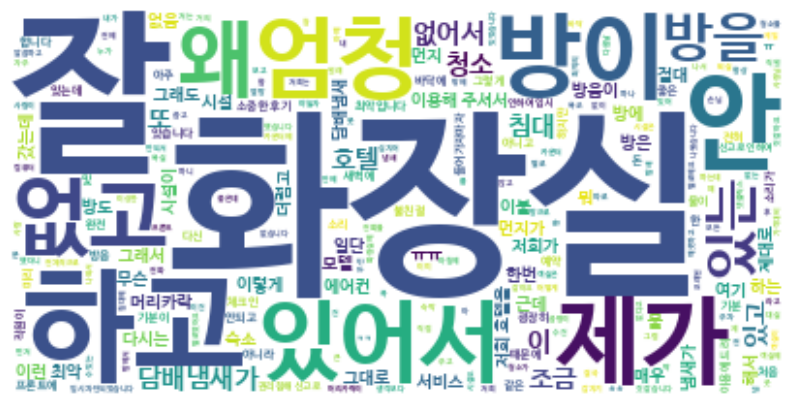

In [68]:
plt.figure(figsize=(10,6))
plt.imshow(wc3, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['인기테그,별점 낮은순 후기,별점 높은순 후기'] = df['인기테그'].astype(str) + df['별점 낮은순 후기'].astype(str) + df['별점 높은순 후기'].astype(str)

In [ ]:
wc4 = WordCloud(background_color='white', max_words=2000,font_path=font_path)
tag_string4 = ' '.join(df['인기테그,별점 낮은순 후기,별점 높은순 후기'])
wc4.generate(tag_string4)

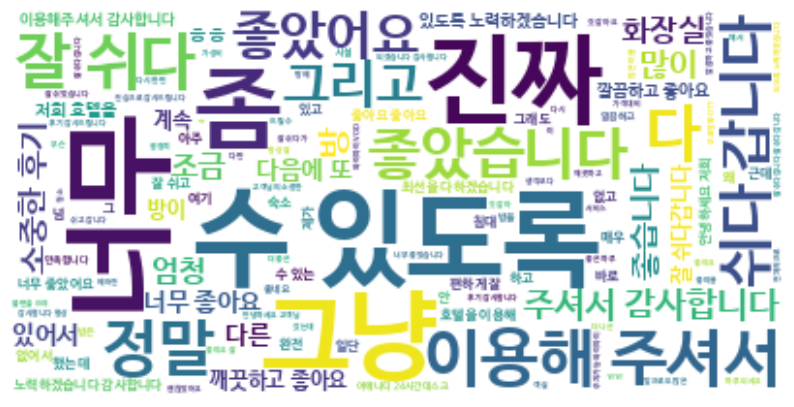

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc4, interpolation='bilinear')
plt.axis('off')
plt.show()